<a href="https://colab.research.google.com/github/LuisIrigoyen/trabajo_final_RL/blob/main/Proyecto_pra%CC%81ctico_grupo_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1:
*   Alumno 2:
*   Alumno 3:






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [ ]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/MyDrive/dqn_spaceinvaders_checkpoints"
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [ ]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

Colab: making sure  /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints  exists.

Colab: Changing directory to  /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints
/content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints
Archivos en el directorio: 
['video', 'logs', 'checkpoint', 'dqn_SpaceInvaders-v0_weights.h5f.data-00000-of-00001', 'dqn_SpaceInvaders-v0_weights.h5f.index', '400k.zip', 'sequential_memory_2.pkl.zip', 'weightsv2.2', 'weightsv2.3', 'sequential_memory_2.3.pkl.zip', 'legacy', 'weightsv4', 'puntuacion 18.3 weigths 5', 'weights_5', 'sequential_memory_5.pkl', 'weights_6', 'wrapper', 'sequential_memory_6.pkl.zip', 'sequential_memory.pkl.zip', 'cut', 'sequential_memory_cut.pkl', 'cutv2', 'sequential_memory_cutv2.pkl']


---
### 1.4. Instalar librerías necesarias

In [ ]:
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12  #2.8
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.3 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654617 sha256=a7fc139c037fde3cc6ede75d069b1374e0c7f50d5fa21f52a97c4a1c3942e3f7
  Stored in directory: /root/.cache/pip/wheels/07/8b/b7/570cb90b10f17e85ccb291ba1f04af41ec697745104a2263eb
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 3.1.1
    Uninstalling cloudpickle-3.1.1:
      Successfully uninstalled cloudpickle-3.1.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires cloudpickle

---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [ ]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
# from keras.optimizers import Adam  # from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

#### Configuración base

In [ ]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [ ]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

In [ ]:
processor = AtariProcessor()

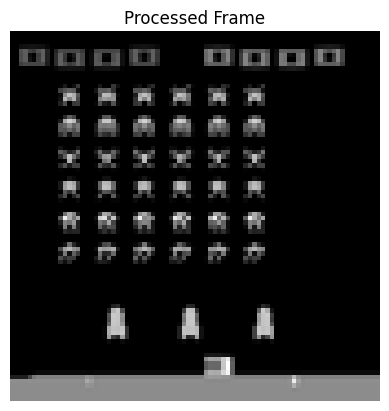

In [ ]:
import matplotlib.pyplot as plt

frame = env.reset()
processed_frame = processor.process_observation(frame)

plt.imshow(processed_frame, cmap='gray')
plt.title("Processed Frame")
plt.axis('off')
plt.show()

In [ ]:
from PIL import Image
import numpy as np

class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)

        # 1. Recortar imagen (eliminar HUD, solo zona de juego)
        # Gym Atari frames suelen ser 210x160x3, recortamos y=34:194
        cropped_observation = observation[34:194, :, :]  # shape now (160, 160, 3)

        # 2. Convertir a PIL, escala de grises, redimensionar
        img = Image.fromarray(cropped_observation)
        img = img.resize(INPUT_SHAPE).convert('L')  # INPUT_SHAPE usualmente (84, 84)

        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

In [ ]:
processor = AtariProcessor()

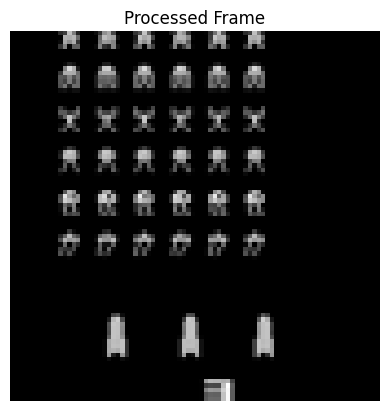

In [ ]:
import matplotlib.pyplot as plt

frame = env.reset()
processed_frame = processor.process_observation(frame)

plt.imshow(processed_frame, cmap='gray')
plt.title("Processed Frame")
plt.axis('off')
plt.show()

## 1. Implementación de la red neuronal

In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Permute

In [ ]:
# Red neuronal
model = Sequential()
model.add(Permute((2, 3, 1), input_shape=(WINDOW_LENGTH, 84, 84)))
model.add(Conv2D(32, (8, 8), strides=(4, 4), activation='relu'))
model.add(Conv2D(64, (4, 4), strides=(2, 2), activation='relu'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(nb_actions, activation='linear'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 4)         0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        8224      
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 512)               1606144   
                                                                 
 dense_1 (Dense)             (None, 6)                 3

## 2. Implementación de la solución DQN

Modificamos el ambiente para inicialmente entrenar el agente con 1 sola vida, lo que reduce el horizonte temporal del crédito (es decir, para que el agente aprenda más rápido qué acción llevó a una recompensa)

In [ ]:
import gym

class LifeTerminatingWrapper(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.lives = 0
        self.was_real_done = True
        # self.last_direction = None  # 'left', 'right', or None
        # self.direction_streak = 0
        # self.steps_since_shot = 0
        self.steps_since_enemy_kill = 0  # Nuevo contador
        self.consecutive_shots = 0

    def step(self, action):
        obs, reward, done, info = self.env.step(action)


        intrinsec_reward = 0.05
        lazy_steps_until_penalty = 20 # mientras menos, se le enseña a disparar más rápido (30 -> 1seg)

        # --- Penalización por no matar enemigos durante n steps (A medida que avanza el juego es más complicado) ---
        # Debe haber un equilibrio para que el agente no se desmotive de jugar lo antes posible
        if reward == 1:
            self.steps_since_enemy_kill = 0
        else:
            self.steps_since_enemy_kill += 1
            if self.steps_since_enemy_kill >= lazy_steps_until_penalty:
                reward -= intrinsec_reward * lazy_steps_until_penalty
                self.steps_since_enemy_kill = 0

        # --- Recompensa por seguir vivo ---
        # Esta en equilibrio con la penalización de 50 pasos sin disparar
        # Importante para no quitarle la motivación de querer jugar
        reward += intrinsec_reward # si le doy más recompensa que penalidad se vuelve lazy


        # Penalización por disparar
        # la idea es que no rompa las defensas
        # y que prefiera aprender a moverse antes que disparar sin sentido
        # if action in [1, 4, 5]:
        #     reward -= 0.05 # con 0.1 si en 5 disparos aleatorios le atino 1 vez al enemigo, mi recompensa es 2x
        """
        if action in [1, 4, 5]:
            self.consecutive_shots += 1
            if self.consecutive_shots == 1:
                reward -= 0.06
            elif self.consecutive_shots == 2:
                reward += 0.03
            # elif self.consecutive_shots == 3:
            #     reward -= 0.01
        else:
            self.consecutive_shots = 0
        """

        # --- Penalización por no disparar durante N pasos ---
        #if action in [1, 4, 5]:  # FIRE, RIGHTFIRE, LEFTFIRE
        #    self.steps_since_shot = 0
        #else:
        #    self.steps_since_shot += 1
        #    if self.steps_since_shot >= 80:
        #        reward -= 0.5 # 0.8 tal vez para compensar a que no solo este vivo de manera pasiva
        #        self.steps_since_shot = 0

        # --- Penalización por cambiar de dirección sin sostenerla al menos 2 pasos ---
        """
        current_direction = None
        if action in [2]:  # RIGHT
            current_direction = 'right'
        elif action in [3]:  # LEFT
            current_direction = 'left'

        if current_direction:
            if self.last_direction == current_direction:
                self.direction_streak += 1
            else:
                if self.direction_streak < 2 and self.last_direction is not None:
                    reward -= 0.05 # 0.1  # 1 Puede que esto confunda al agente? Tal vez -0.1? Para esto tengo que comprender DQN
                self.direction_streak = 1
                self.last_direction = current_direction
        else:
            # NOOP or FIRE: no dirección => se resetea el streak
            self.direction_streak = 0
            self.last_direction = None
        """

        # --- Terminar episodio si pierde una vida ---
        lives = info.get('ale.lives', 0)
        if self.lives > lives > 0:
            done = True
        self.lives = lives

        return obs, reward, done, info

    def reset(self, **kwargs):
        if self.was_real_done:
            obs = self.env.reset(**kwargs)
        else:
            obs, _, _, _ = self.env.step(0)
        self.lives = self.env.unwrapped.ale.lives()
        self.last_direction = None
        self.direction_streak = 0
        return obs

In [ ]:
import gym

class LifeTerminatingWrapper(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.lives = 0
        self.was_real_done = True
        self.steps_since_enemy_kill = 0  # Nuevo contador
        self.consecutive_shots = 0

    def step(self, action):
        obs, reward, done, info = self.env.step(action)

        # --- Terminar episodio si pierde una vida ---
        lives = info.get('ale.lives', 0)
        if self.lives > lives > 0:
            done = True
        self.lives = lives

        return obs, reward, done, info

    def reset(self, **kwargs):
        if self.was_real_done:
            obs = self.env.reset(**kwargs)
        else:
            obs, _, _, _ = self.env.step(0)
        self.lives = self.env.unwrapped.ale.lives()
        self.last_direction = None
        self.direction_streak = 0
        return obs

In [ ]:
import os
from gym.wrappers import Monitor

checkpoint_dir = drive_root
os.makedirs(checkpoint_dir, exist_ok=True)

In [ ]:
from rl.callbacks import Callback

class SaveCheckpointCallback(Callback):
    def __init__(self, interval, path_template, reward_log_path):
        self.interval = interval
        self.path_template = path_template
        self.reward_log_path = reward_log_path
        self.episode_rewards = []

        # Crear carpeta para rewards si es necesario
        if self.reward_log_path:
            reward_dir = os.path.dirname(self.reward_log_path)
            if reward_dir and not os.path.exists(reward_dir):
                os.makedirs(reward_dir)
                print(f"📂 Carpeta creada: {reward_dir}")

    def on_step_end(self, step, logs={}):
        if step % self.interval == 0:
            filename = self.path_template.format(step=step)
            print(f"\n💾 Guardando pesos en: {filename}")
            self.model.save_weights(filename, overwrite=True)


    def on_episode_end(self, episode, logs={}):
        reward = logs.get('episode_reward', 0)
        self.episode_rewards.append(reward)
        if self.reward_log_path:
            np.save(self.reward_log_path, np.array(self.episode_rewards))

In [ ]:
memory = SequentialMemory(limit=330000, window_length=WINDOW_LENGTH)

In [ ]:
env = gym.make(env_name)
env = LifeTerminatingWrapper(env)

### Nuevo entrenamiento con el score recortado y Adam 0.0001

In [ ]:
# Exploracion 1 a 0.1, # steps -> 400k
nb_steps = 400000
nb_steps_annealing = 300000
nb_steps_warmup=40000

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=1, #0.22 # 0.24 # 0.35
                              value_min=0.1, # 0.08
                              value_test=0.0,
                              nb_steps=nb_steps_annealing)


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8500,
               train_interval=4,
               delta_clip=1.0) # si el loss no baja, probar bajarlo a 0.5

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae']) # antes 0.00025

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'cut/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_cut.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 400000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cut/dqn_SpaceInvaders-v0_weights.h5f
    501/400000: episode: 1, duration: 3.645s, episode steps: 501, steps per second: 137, episode reward:  9.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.501 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cut/dqn_SpaceInvaders-v0_weights.h5f
    717/400000: episode: 2, duration: 1.424s, episode steps: 216, steps per second: 152, episode reward:  2.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 2.426 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cut/dqn_SpaceInvaders-v0_weights.h5f
    939/400000: episode: 3, duration: 1.454s, episode steps: 222, steps per second: 153, episode reward:  2.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 2.320 [0.000, 5.000],  loss: --,

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  40185/400000: episode: 138, duration: 14.709s, episode steps: 327, steps per second:  22, episode reward:  6.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.746 [0.000, 5.000],  loss: 0.005168, mae: 0.034906, mean_q: 0.060796, mean_eps: 0.879718

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cut/dqn_SpaceInvaders-v0_weights.h5f
  40344/400000: episode: 139, duration: 9.459s, episode steps: 159, steps per second:  17, episode reward:  0.000, mean reward:  0.000 [ 0.000,  0.000], mean action: 2.447 [0.000, 5.000],  loss: 0.008573, mae: 0.018618, mean_q: 0.015574, mean_eps: 0.879208

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cut/dqn_SpaceInvaders-v0_weights.h5f
  40589/400000: episode: 140, duration: 16.391s, episode steps: 245, steps per second:  15, episode reward:  9.000, mean reward:  0.037 [ 0.000,  1.000], mean action: 2.792 [0.000, 5.000],  loss: 0.009388, mae: 0.037327, mean_q: 0.052743, mean_eps: 0.878602

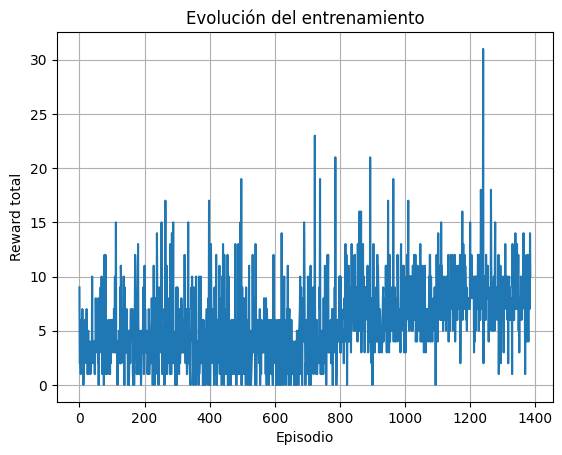

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_cut.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_cut.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
env = gym.make(env_name)

In [ ]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/cut/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 13.000, steps: 677
Episode 2: reward: 25.000, steps: 925
Episode 3: reward: 12.000, steps: 495
Episode 4: reward: 24.000, steps: 1296
Episode 5: reward: 17.000, steps: 1028
Episode 6: reward: 10.000, steps: 531
Episode 7: reward: 15.000, steps: 626
Episode 8: reward: 15.000, steps: 914
Episode 9: reward: 10.000, steps: 486
Episode 10: reward: 14.000, steps: 953
Episode 11: reward: 11.000, steps: 602
Episode 12: reward: 26.000, steps: 1287
Episode 13: reward: 14.000, steps: 956
Episode 14: reward: 20.000, steps: 944
Episode 15: reward: 12.000, steps: 663
Episode 16: reward: 17.000, steps: 1266
Episode 17: reward: 26.000, steps: 1752
Episode 18: reward: 15.000, steps: 1296
Episode 19: reward: 7.000, steps: 413
Episode 20: reward: 16.000, steps: 838
Episode 21: reward: 13.000, steps: 731
Episode 22: reward: 10.000, steps: 596
Episode 23: reward: 14.000, steps: 951
Episode 24: reward: 11.000, steps: 601
Episode 25: reward: 13.000, steps: 671
E

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 16.2


##### Parte 2

In [ ]:
env = gym.make(env_name)
env = LifeTerminatingWrapper(env)

In [ ]:
# Exploracion 1 a 0.1, # steps -> 400k
nb_steps = 200000
nb_steps_annealing = 180000
nb_steps_warmup=40000

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=0.4, #0.22 # 0.24 # 0.35
                              value_min=0.1, # 0.08
                              value_test=0.0,
                              nb_steps=nb_steps_annealing)


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8500,
               train_interval=4,
               delta_clip=1.0) # si el loss no baja, probar bajarlo a 0.5

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae']) # antes 0.00025

In [ ]:
weights_filename = checkpoint_dir + '/cut/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'cutv3/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_cutv3.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 200000 steps ...

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv3/dqn_SpaceInvaders-v0_weights.h5f


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    397/200000: episode: 1, duration: 2.655s, episode steps: 397, steps per second: 150, episode reward: 10.000, mean reward:  0.025 [ 0.000,  1.000], mean action: 2.637 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv3/dqn_SpaceInvaders-v0_weights.h5f
    786/200000: episode: 2, duration: 2.376s, episode steps: 389, steps per second: 164, episode reward: 10.000, mean reward:  0.026 [ 0.000,  1.000], mean action: 2.308 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv3/dqn_SpaceInvaders-v0_weights.h5f
   1049/200000: episode: 3, duration: 1.693s, episode steps: 263, steps per second: 155, episode reward:  8.000, mean reward:  0.030 [ 0.000,  1.000], mean action: 2.513 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoint

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  40199/200000: episode: 123, duration: 14.347s, episode steps: 225, steps per second:  16, episode reward:  8.000, mean reward:  0.036 [ 0.000,  1.000], mean action: 2.467 [0.000, 5.000],  loss: 0.017600, mae: 1.040625, mean_q: 1.271350, mean_eps: 0.333167

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv3/dqn_SpaceInvaders-v0_weights.h5f
  40458/200000: episode: 124, duration: 16.663s, episode steps: 259, steps per second:  16, episode reward:  9.000, mean reward:  0.035 [ 0.000,  1.000], mean action: 2.815 [0.000, 5.000],  loss: 0.015329, mae: 1.025893, mean_q: 1.254379, mean_eps: 0.332787

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv3/dqn_SpaceInvaders-v0_weights.h5f
  40758/200000: episode: 125, duration: 20.586s, episode steps: 300, steps per second:  15, episode reward:  8.000, mean reward:  0.027 [ 0.000,  1.000], mean action: 2.290 [0.000, 5.000],  loss: 0.013716, mae: 1.005662, mean_q: 1.228180, mean_eps: 0.3

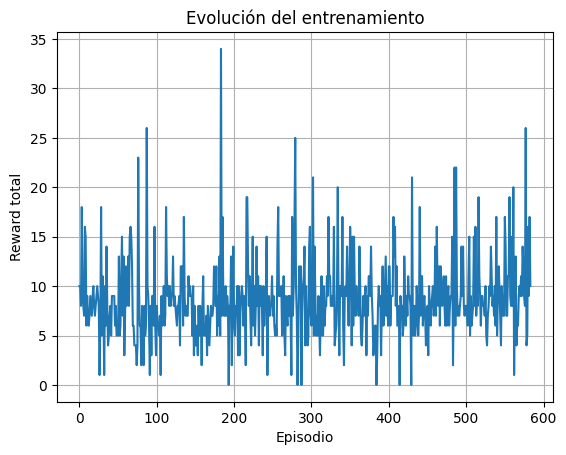

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_cutv3.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_cutv3.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
env = gym.make(env_name)

In [ ]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/cutv3/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 22.000, steps: 1257
Episode 2: reward: 24.000, steps: 962
Episode 3: reward: 28.000, steps: 1093
Episode 4: reward: 9.000, steps: 526
Episode 5: reward: 17.000, steps: 851
Episode 6: reward: 17.000, steps: 742
Episode 7: reward: 24.000, steps: 1057
Episode 8: reward: 18.000, steps: 1136
Episode 9: reward: 14.000, steps: 643
Episode 10: reward: 21.000, steps: 887
Episode 11: reward: 25.000, steps: 1033
Episode 12: reward: 28.000, steps: 1248
Episode 13: reward: 19.000, steps: 851
Episode 14: reward: 27.000, steps: 1230
Episode 15: reward: 13.000, steps: 729
Episode 16: reward: 23.000, steps: 1114
Episode 17: reward: 12.000, steps: 695
Episode 18: reward: 10.000, steps: 558
Episode 19: reward: 21.000, steps: 951
Episode 20: reward: 31.000, steps: 1811
Episode 21: reward: 14.000, steps: 663
Episode 22: reward: 13.000, steps: 1135
Episode 23: reward: 15.000, steps: 655
Episode 24: reward: 26.000, steps: 1256
Episode 25: reward: 24.000, steps: 858
Episode 26: reward: 16.0

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 19.34


#### Parte 3

In [ ]:
memory = SequentialMemory(limit=330000, window_length=WINDOW_LENGTH)

In [ ]:
# Cargar
import pickle

with open('sequential_memory_cut.pkl', 'rb') as f:
    memory = pickle.load(f)

In [ ]:
env = gym.make(env_name)
env = LifeTerminatingWrapper(env)

In [ ]:
# Exploracion 1 a 0.1, # steps -> 400k
nb_steps=50000
nb_steps_annealing=50000
nb_steps_warmup=50000

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=0.4, #0.22 # 0.24 # 0.35
                              value_min=0.2, # 0.08
                              value_test=0.0,
                              nb_steps=nb_steps_annealing)


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8500,
               train_interval=4,
               delta_clip=1.0) # si el loss no baja, probar bajarlo a 0.5

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae']) # antes 0.00025

In [ ]:
weights_filename = checkpoint_dir + '/cutv3/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'cutv4/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_cutv4.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

In [ ]:
# Exploracion 1 a 0.1, # steps -> 400k
nb_steps = 50000
nb_steps_annealing = 50000
nb_steps_warmup=0

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=0.1, #0.22 # 0.24 # 0.35
                              value_min=0.08, # 0.08
                              value_test=0.0,
                              nb_steps=nb_steps_annealing)


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8500,
               train_interval=4,
               delta_clip=1.0) # si el loss no baja, probar bajarlo a 0.5

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae']) # antes 0.00025

In [ ]:
weights_filename = checkpoint_dir + '/cutv3/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'cutv4/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_cutv4.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 50000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv4/dqn_SpaceInvaders-v0_weights.h5f
   286/50000: episode: 1, duration: 30.439s, episode steps: 286, steps per second:   9, episode reward: 10.000, mean reward:  0.035 [ 0.000,  1.000], mean action: 3.332 [0.000, 5.000],  loss: 0.017933, mae: 1.482627, mean_q: 1.804475, mean_eps: 0.099942

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv4/dqn_SpaceInvaders-v0_weights.h5f
   782/50000: episode: 2, duration: 41.960s, episode steps: 496, steps per second:  12, episode reward: 12.000, mean reward:  0.024 [ 0.000,  1.000], mean action: 1.698 [0.000, 5.000],  loss: 0.014875, mae: 1.505839, mean_q: 1.832015, mean_eps: 0.099786

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv4/dqn_SpaceInvaders-v0_weights.h5f
  1008/50000: episode: 3, duration: 18.895s, episode steps: 226, steps per second:  12, episode reward:  8.000, mean reward:  0.035 [ 0.000,  1.

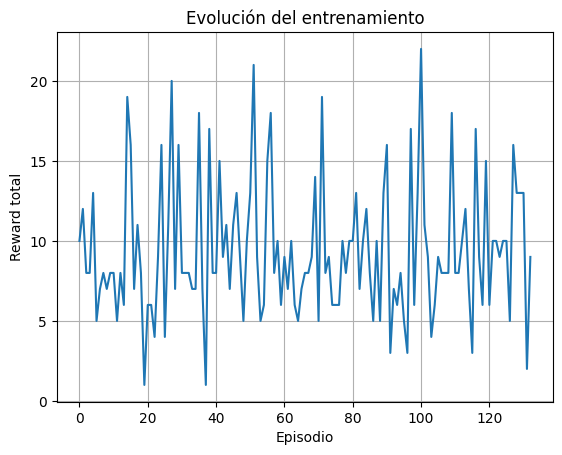

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_cutv4.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_cutv4.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
env = gym.make(env_name)

In [ ]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/cutv4/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 17.000, steps: 769
Episode 2: reward: 25.000, steps: 853
Episode 3: reward: 31.000, steps: 1341
Episode 4: reward: 20.000, steps: 1284
Episode 5: reward: 25.000, steps: 1300
Episode 6: reward: 25.000, steps: 913
Episode 7: reward: 14.000, steps: 692
Episode 8: reward: 10.000, steps: 706
Episode 9: reward: 20.000, steps: 849
Episode 10: reward: 27.000, steps: 1144
Episode 11: reward: 23.000, steps: 916
Episode 12: reward: 30.000, steps: 1409
Episode 13: reward: 31.000, steps: 1140
Episode 14: reward: 22.000, steps: 913
Episode 15: reward: 24.000, steps: 914
Episode 16: reward: 16.000, steps: 775
Episode 17: reward: 25.000, steps: 1231
Episode 18: reward: 23.000, steps: 1040
Episode 19: reward: 19.000, steps: 861
Episode 20: reward: 15.000, steps: 809
Episode 21: reward: 14.000, steps: 643
Episode 22: reward: 18.000, steps: 796
Episode 23: reward: 21.000, steps: 1114
Episode 24: reward: 24.000, steps: 935
Episode 25: reward: 10.000, steps: 5

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 19.9


Otro test 05

In [ ]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/cutv4/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 15.000, steps: 640
Episode 2: reward: 19.000, steps: 1213
Episode 3: reward: 15.000, steps: 661
Episode 4: reward: 28.000, steps: 1213
Episode 5: reward: 22.000, steps: 1058
Episode 6: reward: 12.000, steps: 634
Episode 7: reward: 18.000, steps: 876
Episode 8: reward: 26.000, steps: 1142
Episode 9: reward: 13.000, steps: 626
Episode 10: reward: 26.000, steps: 1069
Episode 11: reward: 16.000, steps: 731
Episode 12: reward: 10.000, steps: 564
Episode 13: reward: 23.000, steps: 1031
Episode 14: reward: 17.000, steps: 987
Episode 15: reward: 28.000, steps: 1088
Episode 16: reward: 19.000, steps: 818
Episode 17: reward: 35.000, steps: 1985
Episode 18: reward: 27.000, steps: 1395
Episode 19: reward: 20.000, steps: 714
Episode 20: reward: 23.000, steps: 944
Episode 21: reward: 16.000, steps: 644
Episode 22: reward: 15.000, steps: 581
Episode 23: reward: 14.000, steps: 722
Episode 24: reward: 32.000, steps: 1609
Episode 25: reward: 15.000, steps: 657
Episode 26: reward: 29.0

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 20.16


Otro test 03

In [ ]:
# Testing part to calculate the mean reward 02
weights_filename = checkpoint_dir + '/cutv4/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 35.000, steps: 1809
Episode 2: reward: 17.000, steps: 837
Episode 3: reward: 21.000, steps: 800
Episode 4: reward: 27.000, steps: 1133
Episode 5: reward: 22.000, steps: 942
Episode 6: reward: 19.000, steps: 1104
Episode 7: reward: 22.000, steps: 1542
Episode 8: reward: 29.000, steps: 1409
Episode 9: reward: 20.000, steps: 992
Episode 10: reward: 16.000, steps: 711
Episode 11: reward: 34.000, steps: 1463
Episode 12: reward: 16.000, steps: 870
Episode 13: reward: 19.000, steps: 692
Episode 14: reward: 23.000, steps: 1057
Episode 15: reward: 21.000, steps: 1054
Episode 16: reward: 20.000, steps: 663
Episode 17: reward: 12.000, steps: 538
Episode 18: reward: 22.000, steps: 917
Episode 19: reward: 22.000, steps: 1084
Episode 20: reward: 22.000, steps: 1010
Episode 21: reward: 10.000, steps: 675
Episode 22: reward: 11.000, steps: 643
Episode 23: reward: 15.000, steps: 690
Episode 24: reward: 20.000, steps: 1347
Episode 25: reward: 27.000, steps:

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 20.5


el modelo 115

In [ ]:
# Testing part to calculate the mean reward 02
weights_filename = checkpoint_dir + '/cutv4/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 18.000, steps: 1090
Episode 2: reward: 22.000, steps: 962
Episode 3: reward: 11.000, steps: 598
Episode 4: reward: 24.000, steps: 797
Episode 5: reward: 30.000, steps: 1617
Episode 6: reward: 23.000, steps: 1237
Episode 7: reward: 13.000, steps: 847
Episode 8: reward: 15.000, steps: 1098
Episode 9: reward: 25.000, steps: 1515
Episode 10: reward: 10.000, steps: 616
Episode 11: reward: 16.000, steps: 876
Episode 12: reward: 30.000, steps: 1009
Episode 13: reward: 17.000, steps: 1653
Episode 14: reward: 17.000, steps: 699
Episode 15: reward: 16.000, steps: 822
Episode 16: reward: 17.000, steps: 976
Episode 17: reward: 12.000, steps: 786
Episode 18: reward: 22.000, steps: 840
Episode 19: reward: 13.000, steps: 547
Episode 20: reward: 16.000, steps: 863
Episode 21: reward: 20.000, steps: 875
Episode 22: reward: 30.000, steps: 1426
Episode 23: reward: 16.000, steps: 765
Episode 24: reward: 30.000, steps: 1072
Episode 25: reward: 24.000, steps: 1

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 18.5


prueba

In [ ]:
#memory = SequentialMemory(limit=600000, window_length=WINDOW_LENGTH)

In [ ]:
# Exploracion 1 a 0.1, # steps -> 400k
nb_steps = 50000
nb_steps_annealing = 50000
nb_steps_warmup=0

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=0.1, #0.22 # 0.24 # 0.35
                              value_min=0.08, # 0.08
                              value_test=0.0,
                              nb_steps=nb_steps_annealing)


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8500,
               train_interval=4,
               delta_clip=1.0) # si el loss no baja, probar bajarlo a 0.5

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae']) # antes 0.00025

In [ ]:
weights_filename = checkpoint_dir + '/cutv4/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [102]:
checkpoint_path = os.path.join(checkpoint_dir, 'cutv5/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_cutv5.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 50000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv5/dqn_SpaceInvaders-v0_weights.h5f
   281/50000: episode: 1, duration: 27.774s, episode steps: 281, steps per second:  10, episode reward:  8.000, mean reward:  0.028 [ 0.000,  1.000], mean action: 3.089 [0.000, 5.000],  loss: 0.013169, mae: 1.558354, mean_q: 1.888872, mean_eps: 0.099943

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv5/dqn_SpaceInvaders-v0_weights.h5f
   536/50000: episode: 2, duration: 18.216s, episode steps: 255, steps per second:  14, episode reward:  7.000, mean reward:  0.027 [ 0.000,  1.000], mean action: 2.435 [0.000, 5.000],  loss: 0.013994, mae: 1.543742, mean_q: 1.871735, mean_eps: 0.099837

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv5/dqn_SpaceInvaders-v0_weights.h5f
   771/50000: episode: 3, duration: 18.564s, episode steps: 235, steps per second:  13, episode reward:  8.000, mean reward:  0.034 [ 0.000,  1.

In [103]:
env = gym.make(env_name)

In [104]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/cutv4/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 21.000, steps: 953
Episode 2: reward: 10.000, steps: 713
Episode 3: reward: 13.000, steps: 843
Episode 4: reward: 14.000, steps: 1081
Episode 5: reward: 12.000, steps: 703
Episode 6: reward: 15.000, steps: 1155
Episode 7: reward: 18.000, steps: 808
Episode 8: reward: 14.000, steps: 843
Episode 9: reward: 16.000, steps: 707
Episode 10: reward: 10.000, steps: 669
Episode 11: reward: 12.000, steps: 815
Episode 12: reward: 21.000, steps: 931
Episode 13: reward: 24.000, steps: 1295
Episode 14: reward: 10.000, steps: 636
Episode 15: reward: 13.000, steps: 607
Episode 16: reward: 15.000, steps: 829
Episode 17: reward: 13.000, steps: 670
Episode 18: reward: 11.000, steps: 681
Episode 19: reward: 20.000, steps: 834
Episode 20: reward: 9.000, steps: 638
Episode 21: reward: 5.000, steps: 397
Episode 22: reward: 10.000, steps: 461
Episode 23: reward: 14.000, steps: 741
Episode 24: reward: 14.000, steps: 1111
Episode 25: reward: 16.000, steps: 891
Epis

Creo que mejor rango de exploracion del 35 al 18, podriamos mandar un warmup con una fija de 20% y guardar en memoria y disco, y con los datos de esta exploracion despues hacer un ajuste de pesos con 10%.

O hacer una fija con 30%, ver cual grafica me da con más picos, de esta manera puedo saber cuales trazas son capaces de mejorar el agente

In [ ]:
# Cargar
import pickle

with open('sequential_memory.pkl', 'rb') as f:
    memory = pickle.load(f)

Lo que falló

In [ ]:
memory = SequentialMemory(limit=330000, window_length=WINDOW_LENGTH)

In [ ]:
env = gym.make(env_name)

In [ ]:
# Exploracion 1 a 0.1, # steps -> 400k
nb_steps=90000
nb_steps_warmup=40000

policy = EpsGreedyQPolicy(eps=0.1)

dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8500,
               train_interval=4,
               delta_clip=1.0) # si el loss no baja, probar bajarlo a 0.5

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae']) # antes 0.00025

In [ ]:
weights_filename = checkpoint_dir + '/cut/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'cutv2/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_cutv2.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 90000 steps ...

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv2/dqn_SpaceInvaders-v0_weights.h5f


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   842/90000: episode: 1, duration: 5.435s, episode steps: 842, steps per second: 155, episode reward: 16.000, mean reward:  0.019 [ 0.000,  1.000], mean action: 2.247 [0.000, 5.000],  loss: --, mae: --, mean_q: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv2/dqn_SpaceInvaders-v0_weights.h5f
  1324/90000: episode: 2, duration: 3.049s, episode steps: 482, steps per second: 158, episode reward:  8.000, mean reward:  0.017 [ 0.000,  1.000], mean action: 2.685 [0.000, 5.000],  loss: --, mae: --, mean_q: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv2/dqn_SpaceInvaders-v0_weights.h5f
  2416/90000: episode: 3, duration: 8.115s, episode steps: 1092, steps per second: 135, episode reward: 27.000, mean reward:  0.025 [ 0.000,  1.000], mean action: 2.540 [0.000, 5.000],  loss: --, mae: --, mean_q: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv2/dqn_SpaceInvaders-v0_weights.h5f
  3518

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 40192/90000: episode: 47, duration: 18.472s, episode steps: 931, steps per second:  50, episode reward: 22.000, mean reward:  0.024 [ 0.000,  1.000], mean action: 2.647 [0.000, 5.000],  loss: 0.018335, mae: 1.023801, mean_q: 1.263856

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv2/dqn_SpaceInvaders-v0_weights.h5f
 41406/90000: episode: 48, duration: 77.440s, episode steps: 1214, steps per second:  16, episode reward: 30.000, mean reward:  0.025 [ 0.000,  1.000], mean action: 2.131 [0.000, 5.000],  loss: 0.015471, mae: 1.033383, mean_q: 1.276608

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv2/dqn_SpaceInvaders-v0_weights.h5f
 42301/90000: episode: 49, duration: 55.853s, episode steps: 895, steps per second:  16, episode reward: 18.000, mean reward:  0.020 [ 0.000,  1.000], mean action: 1.534 [0.000, 5.000],  loss: 0.016989, mae: 1.038613, mean_q: 1.285117

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvade

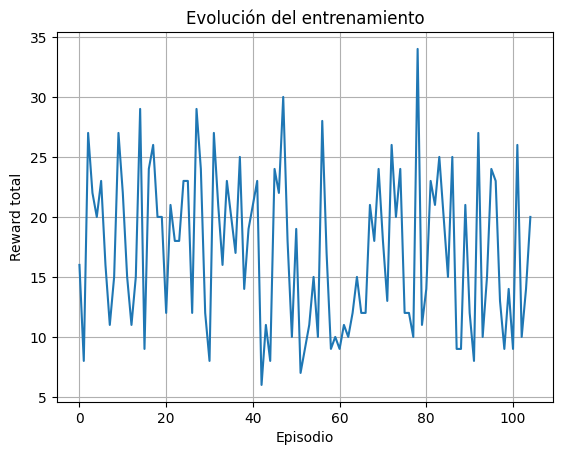

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_cutv2.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_cutv2.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/cutv2/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 8.000, steps: 707
Episode 2: reward: 6.000, steps: 530
Episode 3: reward: 10.000, steps: 821
Episode 4: reward: 6.000, steps: 554
Episode 5: reward: 11.000, steps: 723
Episode 6: reward: 10.000, steps: 659
Episode 7: reward: 4.000, steps: 355
Episode 8: reward: 14.000, steps: 975
Episode 9: reward: 13.000, steps: 659
Episode 10: reward: 15.000, steps: 839
Episode 11: reward: 15.000, steps: 1085
Episode 12: reward: 12.000, steps: 846
Episode 13: reward: 20.000, steps: 1078
Episode 14: reward: 10.000, steps: 677
Episode 15: reward: 15.000, steps: 625
Episode 16: reward: 8.000, steps: 599
Episode 17: reward: 17.000, steps: 935
Episode 18: reward: 8.000, steps: 531
Episode 19: reward: 7.000, steps: 633
Episode 20: reward: 11.000, steps: 916
Episode 21: reward: 11.000, steps: 596
Episode 22: reward: 18.000, steps: 1232
Episode 23: reward: 10.000, steps: 581
Episode 24: reward: 8.000, steps: 649
Episode 25: reward: 13.000, steps: 871
Episode 26:

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 11.48


### Antiguo entrenamiento BoltzmannQPolicy

In [ ]:
# Boltzman !!!!!
nb_steps = 460000
nb_steps_warmup=50000

policy = BoltzmannQPolicy()


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8000,
               train_interval=4,
               delta_clip=1.0)

dqn.compile(Adam(learning_rate=0.00025), metrics=['mae']) # antes 0.00025

### Nuevo entrenamiento desde cero

In [ ]:
# NUEVO !!!!!
# Posibles mejoras, poco warmup aleatorio (puede ser 30k)
# Exploracion 1 a 0.1, # steps -> 400k

nb_steps = 400000
nb_steps_warmup=30000

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=1, #0.22 # 0.24 # 0.35
                              value_min=0.07, # 0.08
                              value_test=0.0,
                              nb_steps=nb_steps)


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8000,
               train_interval=4,
               delta_clip=1.0)

dqn.compile(Adam(learning_rate=0.00025), metrics=['mae']) # antes 0.00025

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 400000 steps ...

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/dqn_SpaceInvaders-v0_weights.h5f


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    592/400000: episode: 1, duration: 3.892s, episode steps: 592, steps per second: 152, episode reward:  9.000, mean reward:  0.015 [ 0.000,  1.000], mean action: 2.490 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/dqn_SpaceInvaders-v0_weights.h5f
   1039/400000: episode: 2, duration: 2.870s, episode steps: 447, steps per second: 156, episode reward:  7.000, mean reward:  0.016 [ 0.000,  1.000], mean action: 2.345 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/dqn_SpaceInvaders-v0_weights.h5f
   1307/400000: episode: 3, duration: 2.125s, episode steps: 268, steps per second: 126, episode reward:  8.000, mean reward:  0.030 [ 0.000,  1.000], mean action: 2.493 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/dqn_SpaceI

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  30070/400000: episode: 100, duration: 7.506s, episode steps: 205, steps per second:  27, episode reward:  2.000, mean reward:  0.010 [ 0.000,  1.000], mean action: 2.171 [0.000, 5.000],  loss: 0.007417, mae: 0.018095, mean_q: 0.023856, mean_eps: 0.930166

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/dqn_SpaceInvaders-v0_weights.h5f
  30355/400000: episode: 101, duration: 18.088s, episode steps: 285, steps per second:  16, episode reward:  4.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.667 [0.000, 5.000],  loss: 0.007113, mae: 0.018592, mean_q: 0.029204, mean_eps: 0.929757

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/dqn_SpaceInvaders-v0_weights.h5f
  30566/400000: episode: 102, duration: 13.941s, episode steps: 211, steps per second:  15, episode reward:  4.000, mean reward:  0.019 [ 0.000,  1.000], mean action: 2.531 [0.000, 5.000],  loss: 0.007404, mae: 0.010011, mean_q: 0.011279, mean_eps: 0.929180

💾 Guar

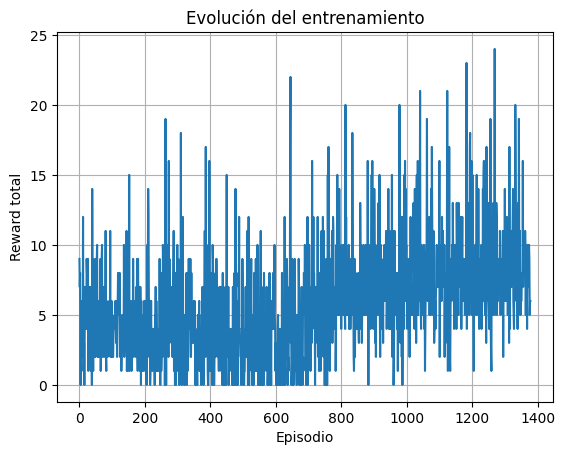

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 21.000, steps: 965
Episode 2: reward: 12.000, steps: 895
Episode 3: reward: 15.000, steps: 1131
Episode 4: reward: 6.000, steps: 486
Episode 5: reward: 18.000, steps: 1352
Episode 6: reward: 13.000, steps: 871
Episode 7: reward: 18.000, steps: 983
Episode 8: reward: 10.000, steps: 624
Episode 9: reward: 10.000, steps: 1249
Episode 10: reward: 9.000, steps: 653
Episode 11: reward: 18.000, steps: 1031
Episode 12: reward: 20.000, steps: 1058
Episode 13: reward: 12.000, steps: 769
Episode 14: reward: 11.000, steps: 697
Episode 15: reward: 12.000, steps: 698
Episode 16: reward: 7.000, steps: 493
Episode 17: reward: 8.000, steps: 694
Episode 18: reward: 11.000, steps: 680
Episode 19: reward: 12.000, steps: 854
Episode 20: reward: 14.000, steps: 890
Episode 21: reward: 11.000, steps: 672
Episode 22: reward: 14.000, steps: 686
Episode 23: reward: 10.000, steps: 633
Episode 24: reward: 10.000, steps: 640
Episode 25: reward: 17.000, steps: 1186
Epis

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 13.4


### 2do entrenamiento

In [ ]:
# Cargar
import pickle

with open('sequential_memory.pkl', 'rb') as f:
    memory = pickle.load(f)

In [ ]:
n_transitions = len(memory.observations)
print(f"Número de transiciones en la memoria: {n_transitions}")

Número de transiciones en la memoria: 401379


In [ ]:
done_flags = memory.terminals  # Lista de True/False
n_episodios = sum(done_flags)
print(f"Número de episodios en la memoria: {n_episodios}")

Número de episodios en la memoria: 1379


#### Nos quedamos con las trazas más útiles
Según la gráfica de evolución del entrenamiento el agente consigue mayores rewards desde el episodio 800 en adelante. Nos quedaremos con esas experiencias:

In [ ]:
# Encontrar los índices donde termina cada episodio
done_indices = [i for i, done in enumerate(memory.terminals) if done]

# Episodio desde donde queremos conservar
ep_inicio = 800
if ep_inicio >= len(done_indices):
    raise ValueError("No hay suficientes episodios en la memoria.")

# Calcular el índice a partir del cual conservar
start_idx = done_indices[ep_inicio - 1] + 1

# Recortar los datos
actions = list(memory.actions)[start_idx:]
rewards = list(memory.rewards)[start_idx:]
terminals = list(memory.terminals)[start_idx:]
observations = list(memory.observations)[start_idx:]

memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)

In [ ]:
from collections import deque

window_length = memory.window_length
obs_window = deque(maxlen=window_length)

for i in range(len(actions)):
    obs_window.append(observations[i])
    if len(obs_window) == window_length:
        memory.append(observation=observations[i],
                          action=actions[i],
                          reward=rewards[i],
                          terminal=terminals[i])

In [ ]:
done_flags = memory.terminals  # Lista de True/False
n_episodios = sum(done_flags)
print(f"Nuevo número de episodios en la memoria: {n_episodios}")

Nuevo número de episodios en la memoria: 579


#### Entrenamiento v3

In [ ]:
env = gym.make(env_name)
env = LifeTerminatingWrapper(env)

In [ ]:
# 2do entrenamiento
nb_steps = 18000
nb_steps_warmup=10000

policy = EpsGreedyQPolicy(eps=0.1)

dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8000,
               train_interval=4,
               delta_clip=1.0)

dqn.compile(Adam(learning_rate=0.00015), metrics=['mae'])

In [ ]:
weights_filename = checkpoint_dir + '/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'weightsv2.3/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_2.3.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 18000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv2.3/dqn_SpaceInvaders-v0_weights.h5f
   337/18000: episode: 1, duration: 4.013s, episode steps: 337, steps per second:  84, episode reward:  9.000, mean reward:  0.027 [ 0.000,  1.000], mean action: 2.291 [0.000, 5.000],  loss: --, mae: --, mean_q: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv2.3/dqn_SpaceInvaders-v0_weights.h5f
   552/18000: episode: 2, duration: 1.990s, episode steps: 215, steps per second: 108, episode reward:  5.000, mean reward:  0.023 [ 0.000,  1.000], mean action: 2.298 [0.000, 5.000],  loss: --, mae: --, mean_q: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv2.3/dqn_SpaceInvaders-v0_weights.h5f
   781/18000: episode: 3, duration: 1.824s, episode steps: 229, steps per second: 126, episode reward:  6.000, mean reward:  0.026 [ 0.000,  1.000], mean action: 2.437 [0.000, 5.000],  loss: --, mae: --, 

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 10028/18000: episode: 30, duration: 11.857s, episode steps: 835, steps per second:  70, episode reward: 14.000, mean reward:  0.017 [ 0.000,  1.000], mean action: 2.599 [0.000, 5.000],  loss: 0.019616, mae: 1.021391, mean_q: 1.245419

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv2.3/dqn_SpaceInvaders-v0_weights.h5f
 10742/18000: episode: 31, duration: 52.539s, episode steps: 714, steps per second:  14, episode reward: 19.000, mean reward:  0.027 [ 0.000,  1.000], mean action: 2.452 [0.000, 5.000],  loss: 0.014422, mae: 1.064180, mean_q: 1.300933

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv2.3/dqn_SpaceInvaders-v0_weights.h5f
 10961/18000: episode: 32, duration: 15.769s, episode steps: 219, steps per second:  14, episode reward:  7.000, mean reward:  0.032 [ 0.000,  1.000], mean action: 2.580 [0.000, 5.000],  loss: 0.017295, mae: 1.078615, mean_q: 1.315501

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_

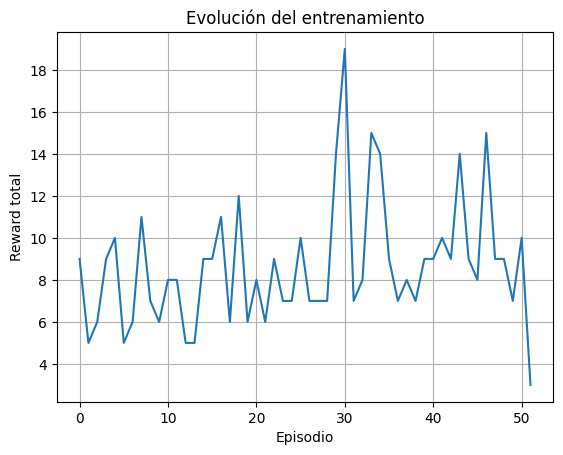

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_2.3.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_2.3.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
env = gym.make(env_name)

In [ ]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/weightsv2.3/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 14.000, steps: 827
Episode 2: reward: 20.000, steps: 893
Episode 3: reward: 21.000, steps: 938
Episode 4: reward: 8.000, steps: 517
Episode 5: reward: 7.000, steps: 489
Episode 6: reward: 28.000, steps: 1183
Episode 7: reward: 22.000, steps: 1077
Episode 8: reward: 24.000, steps: 960
Episode 9: reward: 20.000, steps: 1116
Episode 10: reward: 17.000, steps: 885
Episode 11: reward: 14.000, steps: 658
Episode 12: reward: 28.000, steps: 1121
Episode 13: reward: 12.000, steps: 714
Episode 14: reward: 8.000, steps: 487
Episode 15: reward: 15.000, steps: 660
Episode 16: reward: 23.000, steps: 991
Episode 17: reward: 16.000, steps: 750
Episode 18: reward: 19.000, steps: 741
Episode 19: reward: 18.000, steps: 1067
Episode 20: reward: 24.000, steps: 870
Episode 21: reward: 6.000, steps: 469
Episode 22: reward: 12.000, steps: 695
Episode 23: reward: 14.000, steps: 724
Episode 24: reward: 14.000, steps: 643
Episode 25: reward: 10.000, steps: 613
Episo

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 15.2


#### Entrenamiento v2

In [ ]:
env = gym.make(env_name)
env = LifeTerminatingWrapper(env)

In [ ]:
# 2do entrenamiento
nb_steps = 40000
nb_steps_warmup=10000

policy = EpsGreedyQPolicy(eps=0.1)

dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8000,
               train_interval=4,
               delta_clip=1.0)

dqn.compile(Adam(learning_rate=0.00015), metrics=['mae'])

In [ ]:
weights_filename = checkpoint_dir + '/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'weightsv2.2/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_2.2.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 40000 steps ...

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv2.2/dqn_SpaceInvaders-v0_weights.h5f


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   444/40000: episode: 1, duration: 3.520s, episode steps: 444, steps per second: 126, episode reward: 10.000, mean reward:  0.023 [ 0.000,  1.000], mean action: 2.755 [0.000, 5.000],  loss: --, mae: --, mean_q: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv2.2/dqn_SpaceInvaders-v0_weights.h5f
   827/40000: episode: 2, duration: 3.526s, episode steps: 383, steps per second: 109, episode reward: 11.000, mean reward:  0.029 [ 0.000,  1.000], mean action: 2.433 [0.000, 5.000],  loss: --, mae: --, mean_q: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv2.2/dqn_SpaceInvaders-v0_weights.h5f
  1099/40000: episode: 3, duration: 2.632s, episode steps: 272, steps per second: 103, episode reward:  7.000, mean reward:  0.026 [ 0.000,  1.000], mean action: 2.147 [0.000, 5.000],  loss: --, mae: --, mean_q: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv2.2/dqn_SpaceInvaders-v0_w

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 10072/40000: episode: 28, duration: 9.577s, episode steps: 281, steps per second:  29, episode reward:  7.000, mean reward:  0.025 [ 0.000,  1.000], mean action: 2.352 [0.000, 5.000],  loss: 0.013902, mae: 1.049067, mean_q: 1.283762

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv2.2/dqn_SpaceInvaders-v0_weights.h5f
 10317/40000: episode: 29, duration: 16.985s, episode steps: 245, steps per second:  14, episode reward:  8.000, mean reward:  0.033 [ 0.000,  1.000], mean action: 1.894 [0.000, 5.000],  loss: 0.012892, mae: 1.034661, mean_q: 1.263024

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv2.2/dqn_SpaceInvaders-v0_weights.h5f
 10567/40000: episode: 30, duration: 17.211s, episode steps: 250, steps per second:  15, episode reward:  7.000, mean reward:  0.028 [ 0.000,  1.000], mean action: 2.252 [0.000, 5.000],  loss: 0.015998, mae: 1.084137, mean_q: 1.322396

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_s

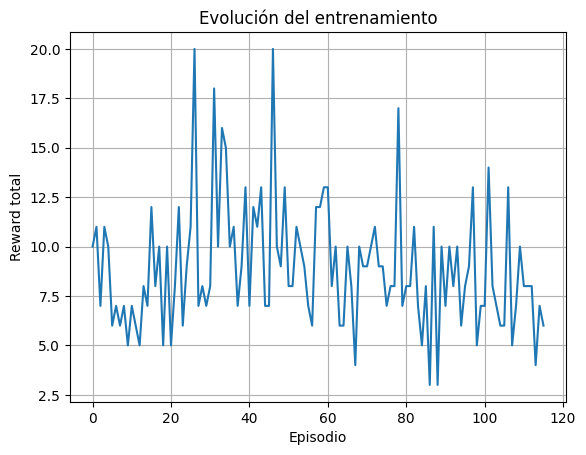

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_2.2.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_2.2.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
env = gym.make(env_name)

In [ ]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/weightsv2.2/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 18.000, steps: 702
Episode 2: reward: 13.000, steps: 884
Episode 3: reward: 19.000, steps: 904
Episode 4: reward: 13.000, steps: 674
Episode 5: reward: 15.000, steps: 680
Episode 6: reward: 21.000, steps: 937
Episode 7: reward: 15.000, steps: 834
Episode 8: reward: 9.000, steps: 403
Episode 9: reward: 16.000, steps: 1065
Episode 10: reward: 27.000, steps: 1238
Episode 11: reward: 20.000, steps: 1074
Episode 12: reward: 11.000, steps: 565
Episode 13: reward: 14.000, steps: 765
Episode 14: reward: 18.000, steps: 1011
Episode 15: reward: 28.000, steps: 923
Episode 16: reward: 10.000, steps: 551
Episode 17: reward: 26.000, steps: 1286
Episode 18: reward: 15.000, steps: 923
Episode 19: reward: 19.000, steps: 1118
Episode 20: reward: 12.000, steps: 669
Episode 21: reward: 17.000, steps: 786
Episode 22: reward: 15.000, steps: 915
Episode 23: reward: 15.000, steps: 673
Episode 24: reward: 17.000, steps: 1158
Episode 25: reward: 12.000, steps: 674
Episode 26: reward: 12.000, 

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 17.76


#### Entrenamiento

In [ ]:
env = gym.make(env_name)
env = LifeTerminatingWrapper(env)

In [ ]:
# 2do entrenamiento
nb_steps = 80000
nb_steps_warmup=10000

policy = EpsGreedyQPolicy(eps=0.1)

dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8000,
               train_interval=4,
               delta_clip=1.0)

dqn.compile(Adam(learning_rate=0.00015), metrics=['mae'])

In [ ]:
weights_filename = checkpoint_dir + '/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'weightsv2/dqn_SpaceInvaders-v0_weights_v2.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_2.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 80000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv2/dqn_SpaceInvaders-v0_weights_v2.h5f
  1464/80000: episode: 1, duration: 11.666s, episode steps: 1464, steps per second: 125, episode reward: 27.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.729 [0.000, 5.000],  loss: --, mae: --, mean_q: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv2/dqn_SpaceInvaders-v0_weights_v2.h5f
  1655/80000: episode: 2, duration: 1.453s, episode steps: 191, steps per second: 131, episode reward:  2.000, mean reward:  0.010 [ 0.000,  1.000], mean action: 1.932 [0.000, 5.000],  loss: --, mae: --, mean_q: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv2/dqn_SpaceInvaders-v0_weights_v2.h5f
  1911/80000: episode: 3, duration: 1.832s, episode steps: 256, steps per second: 140, episode reward:  8.000, mean reward:  0.031 [ 0.000,  1.000], mean action: 2.227 [0.000, 5.000],  loss: --, mae:

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 10048/80000: episode: 25, duration: 8.250s, episode steps: 463, steps per second:  56, episode reward: 10.000, mean reward:  0.022 [ 0.000,  1.000], mean action: 2.641 [0.000, 5.000],  loss: 0.010030, mae: 1.044084, mean_q: 1.276090

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv2/dqn_SpaceInvaders-v0_weights_v2.h5f
 10461/80000: episode: 26, duration: 28.275s, episode steps: 413, steps per second:  15, episode reward: 10.000, mean reward:  0.024 [ 0.000,  1.000], mean action: 2.487 [0.000, 5.000],  loss: 0.014646, mae: 1.072130, mean_q: 1.310946

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv2/dqn_SpaceInvaders-v0_weights_v2.h5f
 10730/80000: episode: 27, duration: 24.736s, episode steps: 269, steps per second:  11, episode reward:  7.000, mean reward:  0.026 [ 0.000,  1.000], mean action: 2.305 [0.000, 5.000],  loss: 0.014020, mae: 1.057162, mean_q: 1.292409

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn

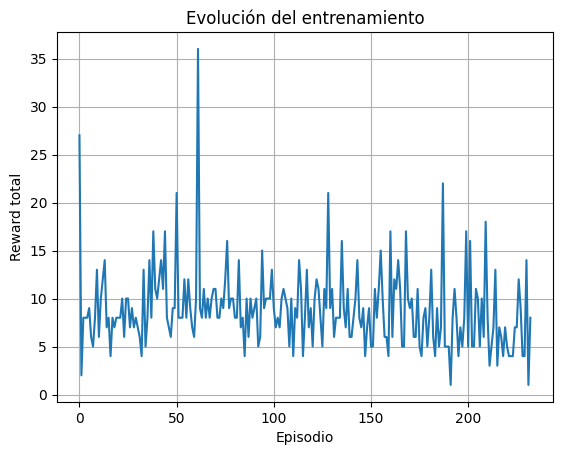

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_2.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_2.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
env = gym.make(env_name)

In [ ]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/legacy/weightsv2/dqn_{}_weights_v2.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 23.000, steps: 1310
Episode 2: reward: 17.000, steps: 1022
Episode 3: reward: 9.000, steps: 468
Episode 4: reward: 8.000, steps: 546
Episode 5: reward: 9.000, steps: 557
Episode 6: reward: 8.000, steps: 555
Episode 7: reward: 17.000, steps: 624
Episode 8: reward: 13.000, steps: 735
Episode 9: reward: 18.000, steps: 880
Episode 10: reward: 9.000, steps: 509
Episode 11: reward: 10.000, steps: 632
Episode 12: reward: 14.000, steps: 873
Episode 13: reward: 10.000, steps: 569
Episode 14: reward: 10.000, steps: 865
Episode 15: reward: 14.000, steps: 951
Episode 16: reward: 8.000, steps: 648
Episode 17: reward: 14.000, steps: 677
Episode 18: reward: 18.000, steps: 999
Episode 19: reward: 7.000, steps: 521
Episode 20: reward: 19.000, steps: 960
Episode 21: reward: 7.000, steps: 543
Episode 22: reward: 7.000, steps: 377
Episode 23: reward: 10.000, steps: 799
Episode 24: reward: 14.000, steps: 646
Episode 25: reward: 22.000, steps: 1302
Episode 26: 

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 12.84


### 3er entrenamiento

In [ ]:
# Cargar
import pickle

with open('sequential_memory_2.pkl', 'rb') as f:
    memory = pickle.load(f)

In [ ]:
env = gym.make(env_name)
env = LifeTerminatingWrapper(env)

In [ ]:
# 3er entrenamiento
nb_steps = 80000
nb_steps_warmup=0

policy = EpsGreedyQPolicy(eps=0.1)

dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8000,
               train_interval=4,
               delta_clip=1.0)

dqn.compile(Adam(learning_rate=0.00015), metrics=['mae'])

In [ ]:
weights_filename = checkpoint_dir + '/weightsv2/dqn_SpaceInvaders-v0_weights_v2.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'weightsv3/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_3.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 80000 steps ...

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv3/dqn_SpaceInvaders-v0_weights.h5f


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   235/80000: episode: 1, duration: 16.425s, episode steps: 235, steps per second:  14, episode reward:  3.000, mean reward:  0.013 [ 0.000,  1.000], mean action: 2.340 [0.000, 5.000],  loss: 0.012117, mae: 1.266744, mean_q: 1.541670

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv3/dqn_SpaceInvaders-v0_weights.h5f
   505/80000: episode: 2, duration: 17.389s, episode steps: 270, steps per second:  16, episode reward:  7.000, mean reward:  0.026 [ 0.000,  1.000], mean action: 2.011 [0.000, 5.000],  loss: 0.010420, mae: 1.299207, mean_q: 1.580070

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weightsv3/dqn_SpaceInvaders-v0_weights.h5f
   723/80000: episode: 3, duration: 14.547s, episode steps: 218, steps per second:  15, episode reward:  3.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 1.633 [0.000, 5.000],  loss: 0.010949, mae: 1.304666, mean_q: 1.587060

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spacein

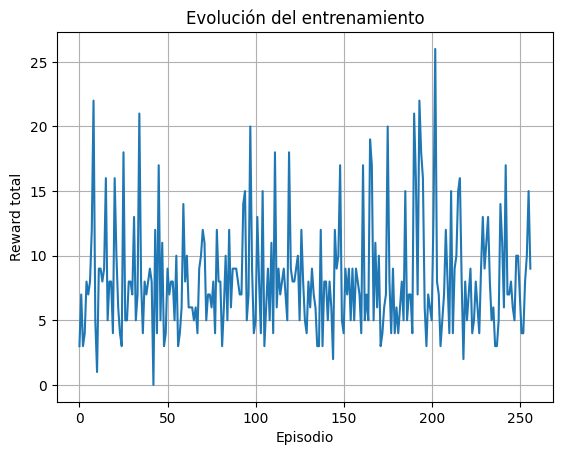

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_3.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_3.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
env = gym.make(env_name)

In [ ]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/legacy/weightsv3/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 14.000, steps: 658
Episode 2: reward: 24.000, steps: 948
Episode 3: reward: 17.000, steps: 1024
Episode 4: reward: 8.000, steps: 439
Episode 5: reward: 14.000, steps: 837
Episode 6: reward: 17.000, steps: 901
Episode 7: reward: 19.000, steps: 779
Episode 8: reward: 20.000, steps: 820
Episode 9: reward: 10.000, steps: 621
Episode 10: reward: 16.000, steps: 915
Episode 11: reward: 12.000, steps: 828
Episode 12: reward: 18.000, steps: 888
Episode 13: reward: 9.000, steps: 502
Episode 14: reward: 9.000, steps: 555
Episode 15: reward: 9.000, steps: 554
Episode 16: reward: 16.000, steps: 628
Episode 17: reward: 13.000, steps: 821
Episode 18: reward: 15.000, steps: 664
Episode 19: reward: 31.000, steps: 1152
Episode 20: reward: 10.000, steps: 506
Episode 21: reward: 22.000, steps: 970
Episode 22: reward: 11.000, steps: 661
Episode 23: reward: 10.000, steps: 564
Episode 24: reward: 9.000, steps: 569
Episode 25: reward: 15.000, steps: 972
Episode 2

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 15.46


### Entrenamiento final (En base al modelo v2.2 que es el mejor promedio 17.4)

In [ ]:
import gym

class IntrinsecRewardWrapper(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.lives = 0
        self.was_real_done = True
        self.steps_since_enemy_kill = 0  # Nuevo contador
        self.consecutive_shots = 0

    def step(self, action):
        obs, reward, done, info = self.env.step(action)

        intrinsec_reward = 0.04
        lazy_steps_until_penalty = 25 # mientras menos, se le enseña a disparar más rápido (30 -> 1seg)

        # --- Penalización por no matar enemigos durante n steps (A medida que avanza el juego es más complicado) ---
        # Debe haber un equilibrio para que el agente no se desmotive de jugar lo antes posible
        if reward == 1:
            self.steps_since_enemy_kill = 0
        else:
            self.steps_since_enemy_kill += 1
            if self.steps_since_enemy_kill >= lazy_steps_until_penalty:
                reward -= intrinsec_reward * lazy_steps_until_penalty
                self.steps_since_enemy_kill = 0

        # --- Recompensa por seguir vivo ---
        # Esta en equilibrio con la penalización de 50 pasos sin disparar
        # Importante para no quitarle la motivación de querer jugar
        reward += intrinsec_reward

        # --- Terminar episodio si pierde una vida ---
        lives = info.get('ale.lives', 0)
        if self.lives > lives > 0:
            done = True
        self.lives = lives

        return obs, reward, done, info

    def reset(self, **kwargs):
        if self.was_real_done:
            obs = self.env.reset(**kwargs)
        else:
            obs, _, _, _ = self.env.step(0)
        self.lives = self.env.unwrapped.ale.lives()
        self.last_direction = None
        self.direction_streak = 0
        return obs

In [ ]:
env = gym.make(env_name)
env = IntrinsecRewardWrapper(env)

In [ ]:
# 2do entrenamiento
nb_steps = 90000
nb_steps_warmup=30000

#policy = EpsGreedyQPolicy(eps=0.15)

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=0.18, #0.22 # 0.24 # 0.35
                              value_min=0.1, # 0.08
                              value_test=0.0,
                              nb_steps=nb_steps)

dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=10000,
               train_interval=4,
               delta_clip=1.0)

dqn.compile(Adam(learning_rate=0.00025), metrics=['mae'])

In [ ]:
weights_filename = checkpoint_dir + '/weightsv2.2/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'weights_5/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_5.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000,
                          path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 90000 steps ...

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weights_5/dqn_SpaceInvaders-v0_weights.h5f


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   363/90000: episode: 1, duration: 3.689s, episode steps: 363, steps per second:  98, episode reward: 10.120, mean reward:  0.028 [-0.960,  1.000], mean action: 2.421 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weights_5/dqn_SpaceInvaders-v0_weights.h5f
   629/90000: episode: 2, duration: 1.879s, episode steps: 266, steps per second: 142, episode reward:  6.360, mean reward:  0.024 [-0.960,  1.000], mean action: 2.259 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weights_5/dqn_SpaceInvaders-v0_weights.h5f
   889/90000: episode: 3, duration: 1.787s, episode steps: 260, steps per second: 146, episode reward:  8.080, mean reward:  0.031 [-0.960,  1.000], mean action: 2.362 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoi

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 30217/90000: episode: 83, duration: 15.546s, episode steps: 215, steps per second:  14, episode reward:  3.480, mean reward:  0.016 [-0.960,  1.000], mean action: 2.437 [0.000, 5.000],  loss: 0.033374, mae: 1.059615, mean_q: 1.284950, mean_eps: 0.153236

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weights_5/dqn_SpaceInvaders-v0_weights.h5f
 30553/90000: episode: 84, duration: 25.899s, episode steps: 336, steps per second:  13, episode reward: 10.080, mean reward:  0.030 [-0.960,  1.000], mean action: 1.929 [0.000, 5.000],  loss: 0.035178, mae: 1.087363, mean_q: 1.318173, mean_eps: 0.152990

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weights_5/dqn_SpaceInvaders-v0_weights.h5f
 30853/90000: episode: 85, duration: 19.196s, episode steps: 300, steps per second:  16, episode reward:  6.720, mean reward:  0.022 [-0.960,  1.000], mean action: 2.260 [0.000, 5.000],  loss: 0.037345, mae: 1.058143, mean_q: 1.281633, mean_eps: 0.15

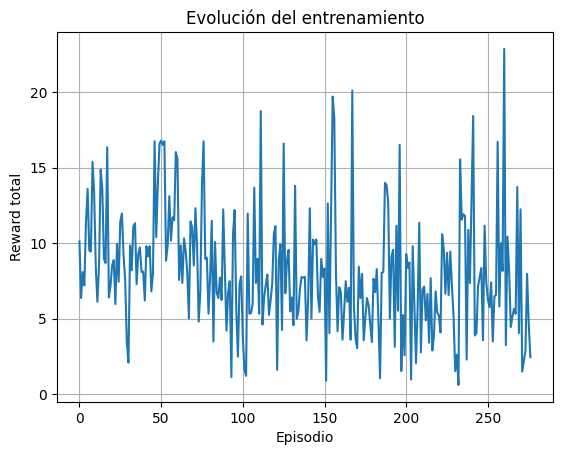

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_5.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_5.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
env = gym.make(env_name)
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/weights_5/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 12.000, steps: 507
Episode 2: reward: 10.000, steps: 628
Episode 3: reward: 18.000, steps: 1041
Episode 4: reward: 15.000, steps: 702
Episode 5: reward: 20.000, steps: 1011
Episode 6: reward: 15.000, steps: 712
Episode 7: reward: 20.000, steps: 892
Episode 8: reward: 12.000, steps: 534
Episode 9: reward: 22.000, steps: 959
Episode 10: reward: 9.000, steps: 388
Episode 11: reward: 11.000, steps: 583
Episode 12: reward: 20.000, steps: 886
Episode 13: reward: 22.000, steps: 1138
Episode 14: reward: 20.000, steps: 871
Episode 15: reward: 11.000, steps: 671
Episode 16: reward: 13.000, steps: 634
Episode 17: reward: 14.000, steps: 726
Episode 18: reward: 11.000, steps: 620
Episode 19: reward: 6.000, steps: 404
Episode 20: reward: 21.000, steps: 831
Episode 21: reward: 15.000, steps: 1518
Episode 22: reward: 14.000, steps: 669
Episode 23: reward: 8.000, steps: 464
Episode 24: reward: 14.000, steps: 692
Episode 25: reward: 9.000, steps: 465
Episod

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 14.78


#### 2da fase

In [ ]:
# Cargar
import pickle

with open('sequential_memory_5.pkl', 'rb') as f:
    memory = pickle.load(f)

In [ ]:
env = gym.make(env_name)
env = IntrinsecRewardWrapper(env)

In [ ]:
# 2do entrenamiento
nb_steps = 80000
nb_steps_warmup=0

#policy = EpsGreedyQPolicy(eps=0.1)

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=0.3, #0.22 # 0.24 # 0.35
                              value_min=0.1, # 0.08
                              value_test=0.0,
                              nb_steps=nb_steps)

dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=10000,
               train_interval=4,
               delta_clip=1.0)

dqn.compile(Adam(learning_rate=0.00025), metrics=['mae'])

In [ ]:
weights_filename = checkpoint_dir + '/weights_5/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'weights_6/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_6.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000,
                          path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 80000 steps ...

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weights_6/dqn_SpaceInvaders-v0_weights.h5f


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   347/80000: episode: 1, duration: 23.202s, episode steps: 347, steps per second:  15, episode reward:  9.560, mean reward:  0.028 [-0.960,  1.000], mean action: 2.738 [0.000, 5.000],  loss: 0.026995, mae: 1.236385, mean_q: 1.540826, mean_eps: 0.299565

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weights_6/dqn_SpaceInvaders-v0_weights.h5f
   561/80000: episode: 2, duration: 14.938s, episode steps: 214, steps per second:  14, episode reward:  5.360, mean reward:  0.025 [-0.960,  1.000], mean action: 2.593 [0.000, 5.000],  loss: 0.032335, mae: 1.226009, mean_q: 1.523414, mean_eps: 0.298865

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/weights_6/dqn_SpaceInvaders-v0_weights.h5f
   840/80000: episode: 3, duration: 17.525s, episode steps: 279, steps per second:  16, episode reward:  5.920, mean reward:  0.021 [-0.960,  1.000], mean action: 2.796 [0.000, 5.000],  loss: 0.028578, mae: 1.242411, mean_q: 1.547682, mean_eps: 0.29825

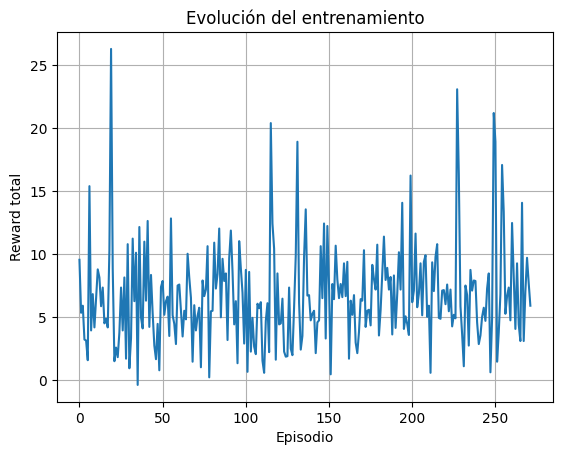

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_6.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_6.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
env = gym.make(env_name)
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/weights_6/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 8.000, steps: 467
Episode 2: reward: 22.000, steps: 976
Episode 3: reward: 10.000, steps: 604
Episode 4: reward: 9.000, steps: 540
Episode 5: reward: 11.000, steps: 564
Episode 6: reward: 26.000, steps: 1236
Episode 7: reward: 14.000, steps: 1079
Episode 8: reward: 16.000, steps: 713
Episode 9: reward: 15.000, steps: 753
Episode 10: reward: 19.000, steps: 1045
Episode 11: reward: 7.000, steps: 494
Episode 12: reward: 12.000, steps: 667
Episode 13: reward: 19.000, steps: 770
Episode 14: reward: 20.000, steps: 1240
Episode 15: reward: 10.000, steps: 648
Episode 16: reward: 25.000, steps: 1044
Episode 17: reward: 14.000, steps: 625
Episode 18: reward: 15.000, steps: 766
Episode 19: reward: 8.000, steps: 497
Episode 20: reward: 13.000, steps: 645
Episode 21: reward: 21.000, steps: 961
Episode 22: reward: 12.000, steps: 640
Episode 23: reward: 21.000, steps: 801
Episode 24: reward: 16.000, steps: 987
Episode 25: reward: 13.000, steps: 716
Episo

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 15.86


### Con wrapper desde cero

In [ ]:
import gym

class IntrinsecRewardWrapper(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.lives = 0
        self.was_real_done = True
        self.steps_since_enemy_kill = 0  # Nuevo contador
        self.consecutive_shots = 0

    def step(self, action):
        obs, reward, done, info = self.env.step(action)

        intrinsec_reward = 0.05
        lazy_steps_until_penalty = 20 # mientras menos, se le enseña a disparar más rápido (30 -> 1seg)

        # --- Penalización por no matar enemigos durante n steps (A medida que avanza el juego es más complicado) ---
        # Debe haber un equilibrio para que el agente no se desmotive de jugar lo antes posible
        if reward == 1:
            self.steps_since_enemy_kill = 0
        else:
            self.steps_since_enemy_kill += 1
            if self.steps_since_enemy_kill >= lazy_steps_until_penalty:
                reward -= intrinsec_reward * lazy_steps_until_penalty
                self.steps_since_enemy_kill = 0

        # --- Recompensa por seguir vivo ---
        # Esta en equilibrio con la penalización de 50 pasos sin disparar
        # Importante para no quitarle la motivación de querer jugar
        reward += intrinsec_reward

        # --- Terminar episodio si pierde una vida ---
        lives = info.get('ale.lives', 0)
        if self.lives > lives > 0:
            done = True
        self.lives = lives

        return obs, reward, done, info

    def reset(self, **kwargs):
        if self.was_real_done:
            obs = self.env.reset(**kwargs)
        else:
            obs, _, _, _ = self.env.step(0)
        self.lives = self.env.unwrapped.ale.lives()
        self.last_direction = None
        self.direction_streak = 0
        return obs

In [ ]:
processor = AtariProcessor()
memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)

In [ ]:
env = gym.make(env_name)
env = IntrinsecRewardWrapper(env)

In [ ]:
# 2do entrenamiento
nb_steps = 400000
nb_steps_warmup=30000

#policy = EpsGreedyQPolicy(eps=0.15)

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=1, #0.22 # 0.24 # 0.35
                              value_min=0.07, # 0.08
                              value_test=0.0,
                              nb_steps=nb_steps)

dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=9000,
               train_interval=4,
               delta_clip=1.0)

dqn.compile(Adam(learning_rate=0.00025), metrics=['mae'])

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'wrapper/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_wrapper.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 400000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/wrapper/dqn_SpaceInvaders-v0_weights.h5f
    215/400000: episode: 1, duration: 2.675s, episode steps: 215, steps per second:  80, episode reward:  5.550, mean reward:  0.026 [-0.950,  1.000], mean action: 2.358 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/wrapper/dqn_SpaceInvaders-v0_weights.h5f
    728/400000: episode: 2, duration: 3.710s, episode steps: 513, steps per second: 138, episode reward:  6.300, mean reward:  0.012 [-0.950,  1.000], mean action: 2.522 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/wrapper/dqn_SpaceInvaders-v0_weights.h5f
    938/400000: episode: 3, duration: 1.444s, episode steps: 210, steps per second: 145, episode reward:  2.400, mean reward:  0.011 [-0.950,  1.000], mean action: 2.300 [0.000, 5.000]

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  30346/400000: episode: 121, duration: 41.374s, episode steps: 509, steps per second:  12, episode reward:  5.150, mean reward:  0.010 [-0.950,  1.000], mean action: 2.460 [0.000, 5.000],  loss: 0.030648, mae: 0.034790, mean_q: 0.042341, mean_eps: 0.929845

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/wrapper/dqn_SpaceInvaders-v0_weights.h5f
  30716/400000: episode: 122, duration: 28.289s, episode steps: 370, steps per second:  13, episode reward:  6.200, mean reward:  0.017 [-0.950,  1.000], mean action: 2.527 [0.000, 5.000],  loss: 0.028208, mae: 0.027602, mean_q: 0.030286, mean_eps: 0.929018

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/wrapper/dqn_SpaceInvaders-v0_weights.h5f
  30955/400000: episode: 123, duration: 17.299s, episode steps: 239, steps per second:  14, episode reward:  1.850, mean reward:  0.008 [-0.950,  1.000], mean action: 2.565 [0.000, 5.000],  loss: 0.032651, mae: 0.030211, mean_q: 0.018721, mean_eps:

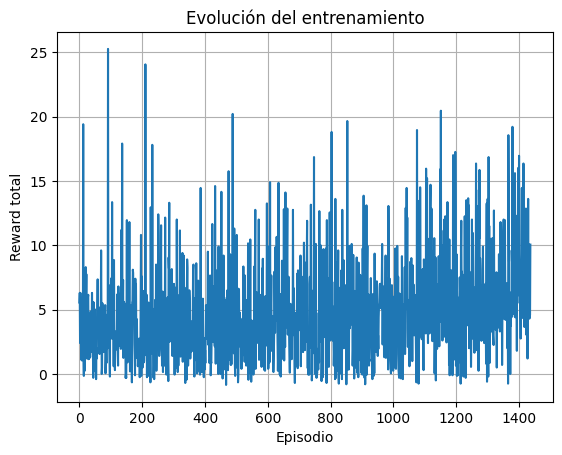

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_wrapper.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_wrapper.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
env = gym.make(env_name)

In [ ]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/wrapper/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 13.000, steps: 647
Episode 2: reward: 8.000, steps: 565
Episode 3: reward: 17.000, steps: 1038
Episode 4: reward: 13.000, steps: 971
Episode 5: reward: 19.000, steps: 1042
Episode 6: reward: 10.000, steps: 676
Episode 7: reward: 6.000, steps: 394
Episode 8: reward: 18.000, steps: 1167
Episode 9: reward: 8.000, steps: 399
Episode 10: reward: 18.000, steps: 927
Episode 11: reward: 7.000, steps: 650
Episode 12: reward: 11.000, steps: 822
Episode 13: reward: 8.000, steps: 792
Episode 14: reward: 7.000, steps: 773
Episode 15: reward: 20.000, steps: 1339
Episode 16: reward: 8.000, steps: 375
Episode 17: reward: 8.000, steps: 684
Episode 18: reward: 13.000, steps: 914
Episode 19: reward: 15.000, steps: 904
Episode 20: reward: 9.000, steps: 840
Episode 21: reward: 9.000, steps: 621
Episode 22: reward: 10.000, steps: 870
Episode 23: reward: 12.000, steps: 951
Episode 24: reward: 16.000, steps: 897
Episode 25: reward: 15.000, steps: 922
Episode 26: 

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 12.7


3. Justificación de los parámetros seleccionados y de los resultados obtenidos

---